./capstoneProject_tensorflow.ipynb
./build_model.ipynb
./README.md
./immo_data.csv.zip
./immo_data.csv
./capstoneProject__xgboost.ipynb
./capstoneProject_linearRegresion.ipynb
./immo_data_final.csv
./data_analysis.ipynb
./server/Dockerfile
./server/model_xg_0.6_20.bin
./server/Pipfile.lock
./server/serve.py
./server/train_model.py
./server/Pipfile
./server/__pycache__/serve.cpython-38.pyc
./server/.ipynb_checkpoints/build_model-checkpoint.ipynb
./.ipynb_checkpoints/data_analysis-checkpoint.ipynb
./.ipynb_checkpoints/build_model-checkpoint.ipynb
./.ipynb_checkpoints/capstoneProject_linearRegresion-checkpoint.ipynb
./.ipynb_checkpoints/capstoneProject__xgboost-checkpoint.ipynb
./.ipynb_checkpoints/capstoneProject_tensorflow-checkpoint.ipynb
df shape: (268850, 49)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   

None

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


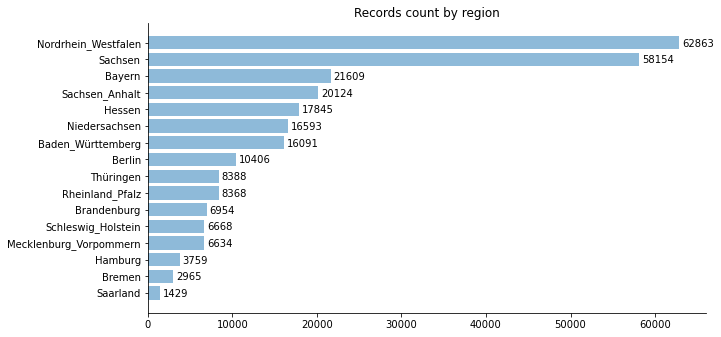

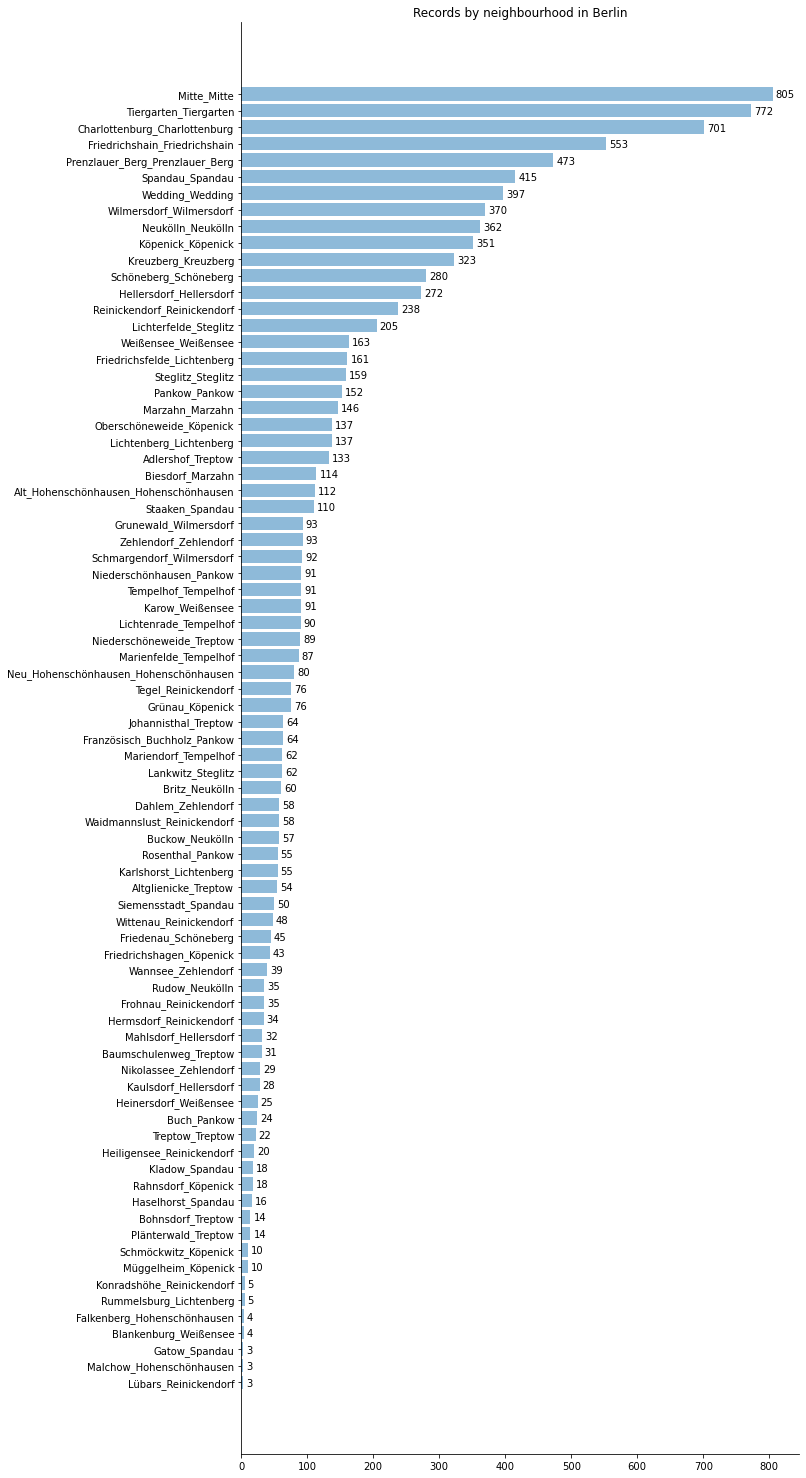

NA records by feature:


<AxesSubplot:>

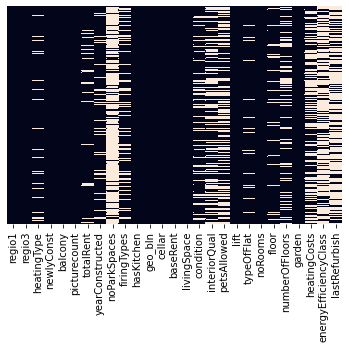

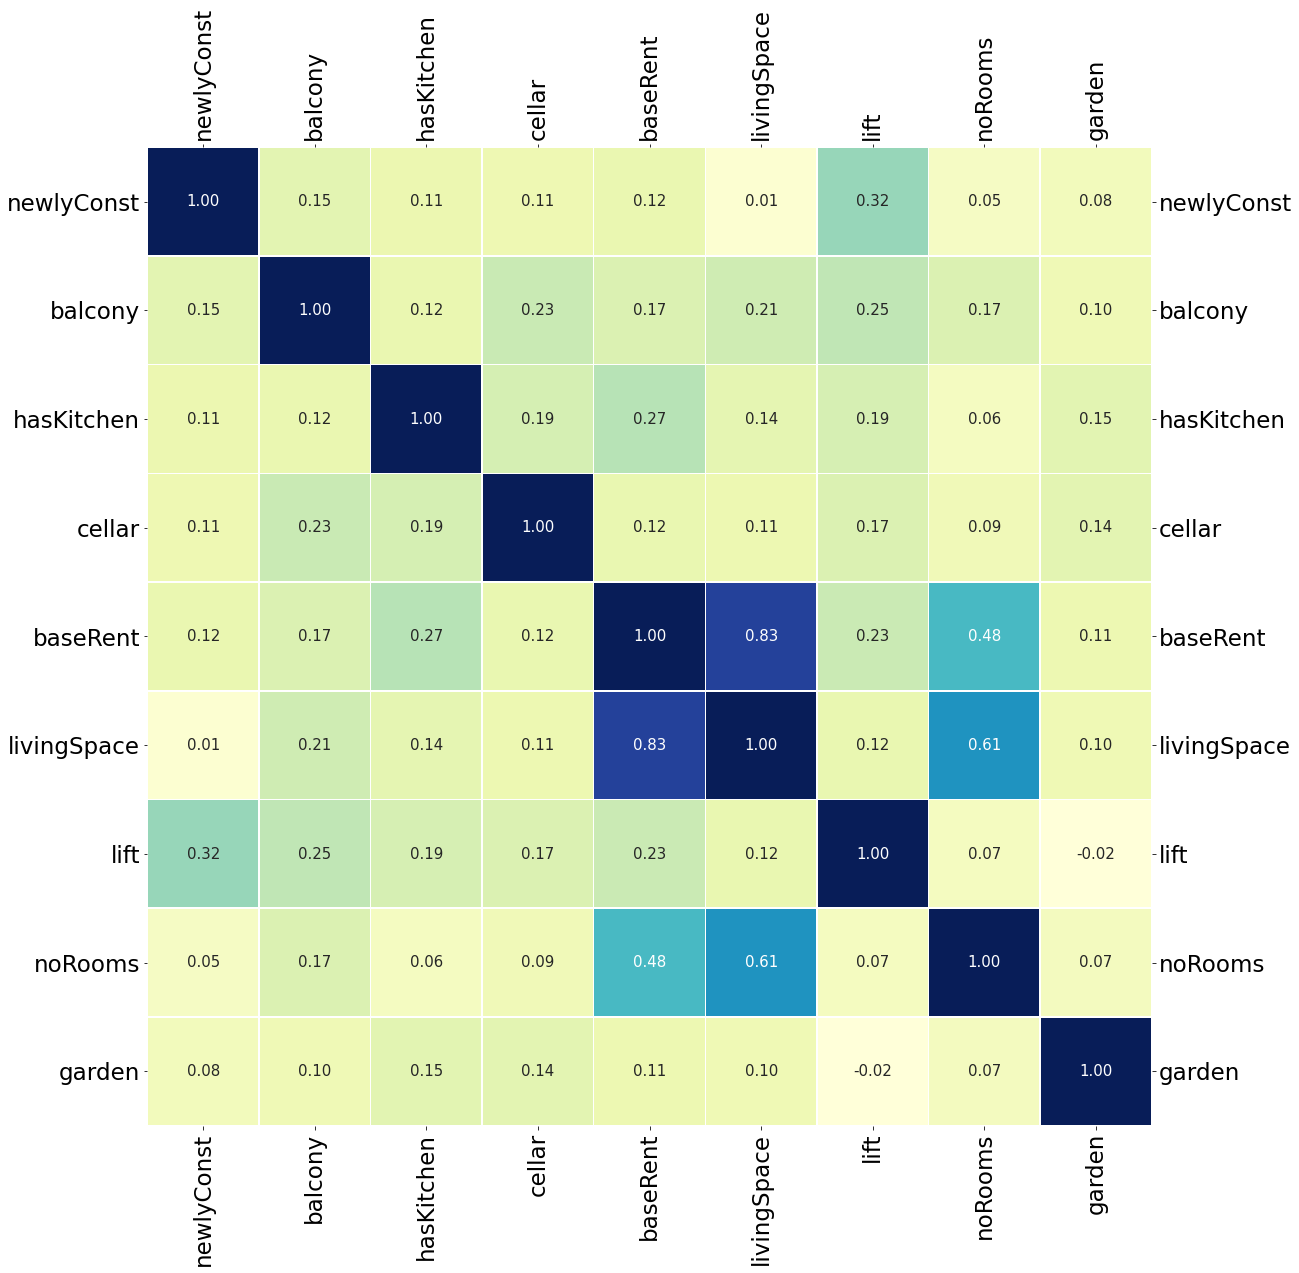

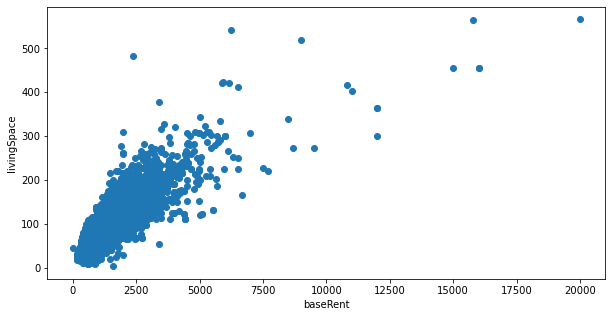

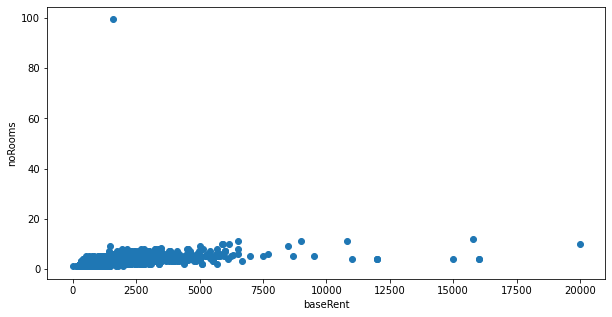

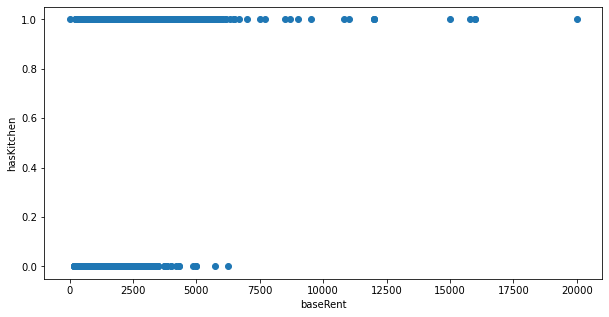

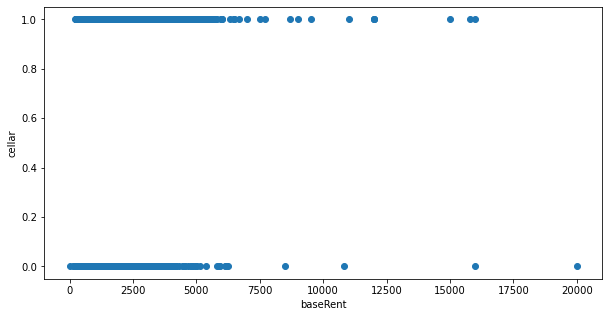

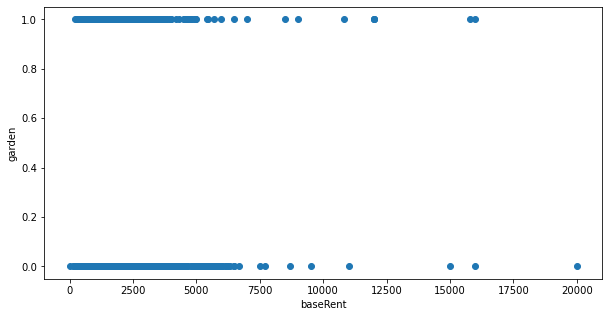

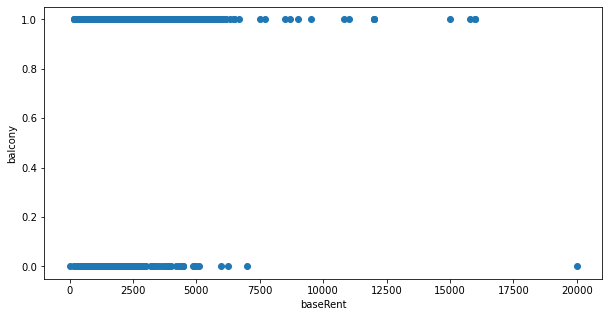

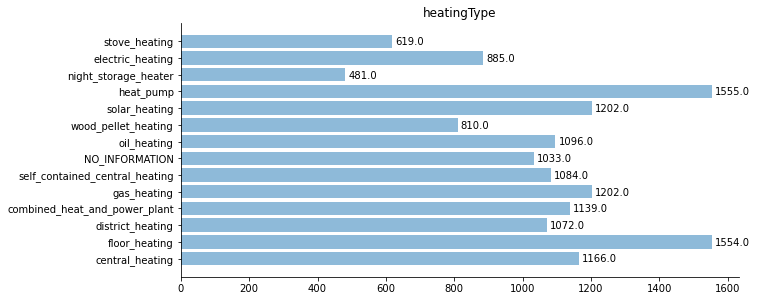

subneighbourhoods count: 79
neighbourhoods count: 23
neighbourhoods: ['spandau' 'weißensee' 'mitte' 'kreuzberg' 'tiergarten' 'köpenick'
 'marzahn' 'hohenschönhausen' 'hellersdorf' 'prenzlauer_berg' 'pankow'
 'charlottenburg' 'tempelhof' 'neukölln' 'wilmersdorf' 'wedding'
 'friedrichshain' 'reinickendorf' 'treptow' 'schöneberg' 'lichtenberg'
 'steglitz' 'zehlendorf']
Final data:


newlyConst       0
balcony          0
hasKitchen       0
cellar           0
baseRent         0
livingSpace      0
lift             0
noRooms          0
garden           0
heating          0
neighbourhood    0
dtype: int64

df_to_split length:  10406

df_full_train length:  8324
df_train length:  6243
df_val length:  2081
df_test length:  2082

y_full_train length:  8324
y_train length:  6243
y_val length:  2081
y_test length:  2082


In [1]:
# import the project1-prepareData notebook:
!pip install ipynb
from ipynb.fs.full.data_analysis import *


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [84]:
berlinDf_final_linear = berlinDf_select.copy()
# berlinDf_final_linear.drop(['', '', '', '', ''], axis='columns', inplace=True)
# 'livingSpace', 'noRooms', 'neighbourhood', 'heating', 'cellar', 'newlyConst', 'balcony', 'hasKitchen', 'lift', 'garden'

berlinDf_final_linear["neighbourhood"] = berlinDf_final_linear["neighbourhood"].astype('category')
berlinDf_final_linear.neighbourhood = berlinDf_final_linear.neighbourhood.cat.codes

berlinDf_final_linear["heating"] = berlinDf_final_linear["heating"].astype('category')
berlinDf_final_linear.heating = berlinDf_final_linear.heating.cat.codes

berlinDf_final_linear["cellar"] = berlinDf_final_linear["cellar"].astype('int')
berlinDf_final_linear["newlyConst"] = berlinDf_final_linear["newlyConst"].astype('int')
berlinDf_final_linear["balcony"] = berlinDf_final_linear["balcony"].astype('int')
berlinDf_final_linear["hasKitchen"] = berlinDf_final_linear["hasKitchen"].astype('int')
berlinDf_final_linear["lift"] = berlinDf_final_linear["cellar"].astype('int')
berlinDf_final_linear["garden"] = berlinDf_final_linear["garden"].astype('int')


df_full_train, df_train, df_val, df_test, y_full_train, y_train, y_val, y_test = split_dataFrame(berlinDf_final_linear)
display(berlinDf_final_linear)
berlinDf_final_linear.info()


df_to_split length:  10406

df_full_train length:  8324
df_train length:  6243
df_val length:  2081
df_test length:  2082

y_full_train length:  8324
y_train length:  6243
y_val length:  2081
y_test length:  2082


,newlyConst,balcony,hasKitchen,cellar,baseRent,livingSpace,lift,noRooms,garden,heating,neighbourhood
45,0,1,1,0,820,77,0,3,0,2,14
61,0,0,0,0,808,62,0,2,0,2,20
77,1,1,1,1,1150,46,1,2,0,2,8
86,0,1,1,1,1200,67,1,2,0,2,4
87,1,1,1,1,1338,73,1,2,0,2,17
...,...,...,...,...,...,...,...,...,...,...,...
268716,0,0,0,1,475,57,1,1,0,2,5
268733,0,0,1,0,750,59,0,2,0,2,14
268746,0,1,0,0,619,95,0,3,0,2,12
268758,1,0,1,0,819,28,0,1,1,2,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10406 entries, 45 to 268829
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   newlyConst     10406 non-null  int64
 1   balcony        10406 non-null  int64
 2   hasKitchen     10406 non-null  int64
 3   cellar         10406 non-null  int64
 4   baseRent       10406 non-null  int64
 5   livingSpace    10406 non-null  int64
 6   lift           10406 non-null  int64
 7   noRooms        10406 non-null  int64
 8   garden         10406 non-null  int64
 9   heating        10406 non-null  int8 
 10  neighbourhood  10406 non-null  int8 
dtypes: int64(9), int8(2)
memory usage: 1.1 MB


In [136]:
from hashlib import sha1

def compute_hash(email):
    return sha1(email.lower().encode('utf-8')).hexdigest()
compute_hash("razorcd@yahoo.com")

'35a89bd1cf9dc20f4a30d70cadf18c60942dfaff'

10
Epoch 1/40
134/134 [==============================] - 1s 2ms/step - loss: 1052.0575 - val_loss: 362.1151
Epoch 2/40
134/134 [==============================] - 0s 1ms/step - loss: 315.9102 - val_loss: 303.1513
Epoch 3/40
134/134 [==============================] - 0s 2ms/step - loss: 304.6260 - val_loss: 291.1046
Epoch 4/40
134/134 [==============================] - 0s 2ms/step - loss: 295.6837 - val_loss: 283.8232
Epoch 5/40
134/134 [==============================] - 0s 2ms/step - loss: 287.7386 - val_loss: 274.6713
Epoch 6/40
134/134 [==============================] - 0s 1ms/step - loss: 282.0036 - val_loss: 271.0651
Epoch 7/40
134/134 [==============================] - 0s 1ms/step - loss: 279.1101 - val_loss: 267.9598
Epoch 8/40
134/134 [==============================] - 0s 2ms/step - loss: 274.5510 - val_loss: 265.3062
Epoch 9/40
134/134 [==============================] - 0s 2ms/step - loss: 272.7753 - val_loss: 263.5062
Epoch 10/40
134/134 [==============================] - 0s 3m

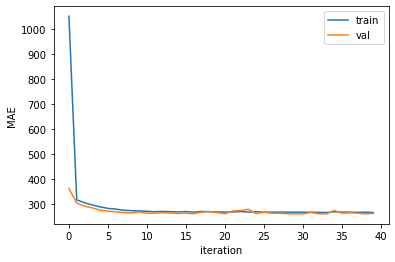

In [135]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout
from keras import backend as K

def mean_absolute_error(y_true, y_pred):
    return K.mean(K.abs(y_pred - y_true))

feature_size = len(df_full_train.columns)
print(feature_size)

classifier = Sequential()
classifier.add(Dense(units=10, kernel_initializer='he_uniform', activation='relu', input_dim=feature_size))
# classifier.add(Dense(units=8, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=5, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=3, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='he_uniform', activation='relu'))

learning_rate = 0.01
optimizer = keras.optimizers.adam_v2.Adam(learning_rate=learning_rate)
loss = keras.losses.MAE
classifier.compile(loss=loss, optimizer=optimizer)
# classifier.compile(loss=mean_absolute_error, optimizer='Adamax')

history = classifier.fit(df_full_train, 
                         y_full_train.astype('float32'), 
                         validation_split=0.20, 
                         batch_size=50, 
                         epochs=40)


plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.ylabel("MAE")
plt.xlabel("iteration")
plt.legend()

print("train min MAE:" ,min(history.history['loss']))
print("train min MAE:" ,min(history.history['val_loss']))